In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Scraped_Car_Review_nissan.csv', lineterminator='\n')


In [5]:
data.head()

,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,0,on 03/07/13 12:29 PM (PST),deltasierra,2013 Nissan NV Passenger Van 3500 SL 3dr Van (...,Outstanding large family van,"With the expected arrival of our 6th child, o...",4.125
1,1,on 07/06/18 15:50 PM (PDT),Daniel r,2015 Nissan NV Passenger Van 3500 SL 3dr Van (...,Back ac suck,Rear ac blow to slow that my kid do not want ...,3.000
2,2,on 03/26/18 14:30 PM (PDT),Bobbie D.,2015 Nissan NV Passenger Van 3500 SL 3dr Van (...,we love ours!,This is not a small astro van type.You will n...,5.000
3,3,on 05/14/16 09:50 AM (PDT),Joe Flash,2015 Nissan NV Passenger Van 3500 SL 3dr Van (...,My 2014 Nissan NVP SL review,I am very satisfied with my 2014 Nissan NV S...,5.000
4,4,on 10/21/15 21:37 PM (PDT),Sam,2015 Nissan NV Passenger Van 3500 S 3dr Van (5...,Not for a family,I went from a Honda Odyssey to this van since...,3.000


In [11]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [29]:
most_reviewed_cars = data["Vehicle_Title"].value_counts()[:50]

In [47]:
vehicle_and_rating = data[['Vehicle_Title', 'Rating\r', 'Review']]

In [57]:
car_and_rating = {}

for car in most_reviewed_cars.index:
    selected_rows = data[data['Vehicle_Title'] == car]
    average_rating = selected_rows['Rating\r'].mean()
    car_and_rating[car] = average_rating
    
car_and_rating

{'2002 Nissan Sentra SE-R Spec V SE-R Spec V 4dr Sedan (2.5L 4cyl 6M)': 4.285714285714286,
 '2003 Nissan Sentra SE-R Spec V SE-R Spec V 4dr Sedan (2.5L 4cyl 6M)': 4.430357142857143,
 '2010 Nissan Maxima Sedan 3.5 SV 4dr Sedan (3.5L 6cyl CVT)': 4.68859649122807,
 '2007 Nissan Altima Hybrid Sedan 4dr Sedan (2.5L 4cyl gas/electric hybrid CVT)': 4.848214285714286,
 '2009 Nissan Maxima Sedan 3.5 SV 4dr Sedan (3.5L 6cyl CVT)': 4.4795454545454545,
 '2004 Nissan Sentra SE-R Spec V SE-R Spec V 4dr Sedan (2.5L 4cyl 6M)': 4.398584905660377,
 '2002 Nissan Sentra Sedan GXE 4dr Sedan (1.8L 4cyl 5M)': 4.153846153846154,
 '2002 Nissan Sentra SE-R SE-R 4dr Sedan (2.5L 4cyl 5M)': 4.232843137254902,
 '2008 Nissan Altima Sedan 2.5 S 4dr Sedan (2.5L 4cyl CVT)': 3.7907608695652173,
 '2003 Nissan Maxima Sedan SE 4dr Sedan (3.5L 6cyl 6M)': 4.505434782608695,
 '2010 Nissan Altima Sedan 2.5 S 4dr Sedan (2.5L 4cyl CVT)': 4.058333333333334,
 '1997 Nissan Altima Sedan GXE 4dr Sedan': 4.394444444444445,
 '2007 Niss

In [120]:
descending_rating = {k: v for k, v in sorted(car_and_rating.items(), key=lambda item: item[1], reverse=True)}


In [105]:
shortcut = []

for long_word in descending_rating.keys():
    word = long_word.split()
    word = word[0] + ' ' + word[1] + ' ' + word[2]
    shortcut.append(word)

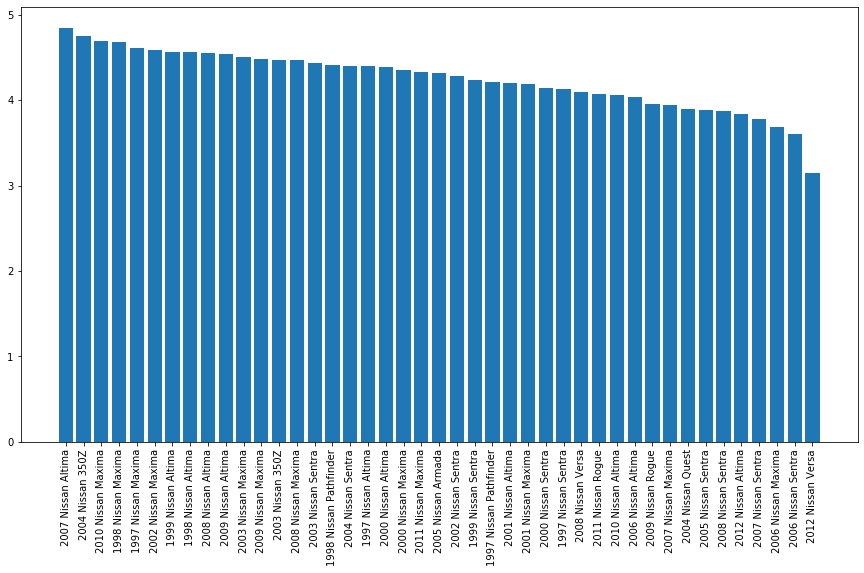

In [119]:
%matplotlib inline
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.bar(shortcut, descending_rating.values());

In [133]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
cachedStopWords = stopwords.words("english")

words_dict = {}

for review in data['Review']:
    words = review.split()
    for word in words:
        if word.lower() in cachedStopWords:
            pass
        else:
            if word in words_dict:
                words_dict[word] += 1
            else:
                words_dict[word] = 1
                
descending_words = {k: v for k, v in sorted(words_dict.items(), key=lambda item: item[1], reverse=True)}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\woute\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [151]:
first10pairs = {k: descending_words[k] for k in list(descending_words)[:20]}
first10pairs

{'car': 10632,
 'Nissan': 4775,
 'miles': 3858,
 'like': 3705,
 'get': 3441,
 'great': 3280,
 'it.': 2786,
 'truck': 2782,
 'new': 2711,
 'would': 2600,
 'bought': 2565,
 'good': 2538,
 'one': 2478,
 'drive': 2394,
 'love': 2328,
 'gas': 2233,
 'car.': 2220,
 'vehicle': 2109,
 'back': 2015,
 'still': 2015}

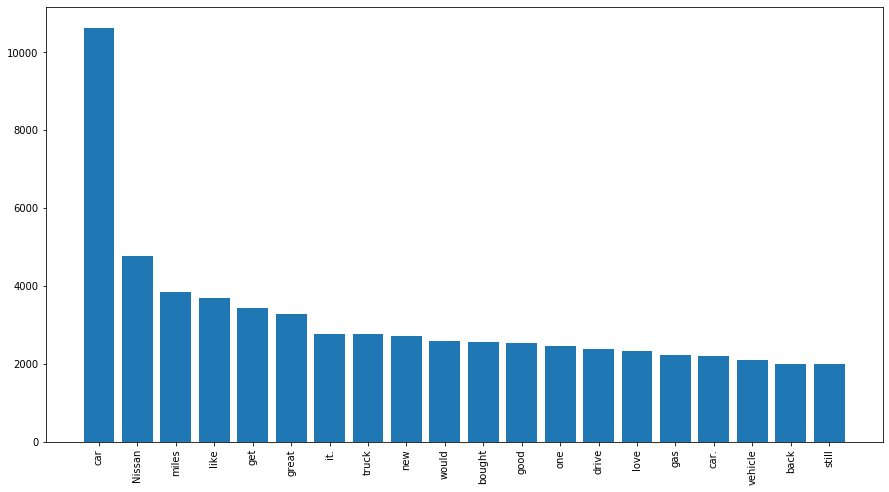

In [152]:
%matplotlib inline
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.bar(first10pairs.keys(), first10pairs.values());